#IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#LOADING THE DATA SET


In [58]:
data=pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\SALES PREDICTION PROJECT\\AS_SALES.csv')
print(data)

           Bill Date Bill Time Transaction Type          Bill No.  \
0         01-06-2022  10:54:13            Sales  3488301I22001538   
1         01-06-2022  10:54:13            Sales  3488301I22001538   
2         01-06-2022  10:54:13            Sales  3488301I22001538   
3         01-06-2022  10:54:13            Sales  3488301I22001538   
4         01-06-2022  10:54:13            Sales  3488301I22001538   
...              ...       ...              ...               ...   
37975     30-06-2024  21:54:39          Returns  3488302I24000420   
37976     30-06-2024  21:54:39            Sales  3488302I24000420   
37977     30-06-2024  12:58:32            Sales  3488301I24001919   
37978     30-06-2024  14:17:17            Sales  3488301I24001921   
37979  Grand Total :       NaN              NaN               NaN   

            Salesman Sales Promo Code  \
0          ANCY SOBY       AE-T000076   
1          ANCY SOBY       AE-T000076   
2          ANCY SOBY       AE-T000076   
3      

Pre_processing

# DATA CLEANING

In [6]:
data.head()

,Bill Date,Bill Time,Transaction Type,Bill No.,Salesman,Sales Promo Code,Sales Promo Description,Original Bill No,Sales Order Number,Stock No.,...,Value,Tax Percent,VAT Amount,SGST Value,CGST Value,IGST Value,CESS Value,Item Discount,Bill Discount,Total Discount
0,01-06-2022,10:54:13,Sales,3488301I22001538,ANCY SOBY,AE-T000076,"ABV Promo-Shop for Rs.6,999/-Get a Backpack at...",NaN,NaN,8.905650e+12,...,699.0,5.0,0,16.64,16.64,0.0,0,0.0,0.0,0.0
1,01-06-2022,10:54:13,Sales,3488301I22001538,ANCY SOBY,AE-T000076,"ABV Promo-Shop for Rs.6,999/-Get a Backpack at...",NaN,NaN,8.905500e+12,...,1499.0,12.0,0,80.30,80.30,0.0,0,0.0,0.0,0.0
2,01-06-2022,10:54:13,Sales,3488301I22001538,ANCY SOBY,AE-T000076,"ABV Promo-Shop for Rs.6,999/-Get a Backpack at...",NaN,NaN,8.905500e+12,...,999.0,5.0,0,23.79,23.79,0.0,0,0.0,0.0,0.0
3,01-06-2022,10:54:13,Sales,3488301I22001538,ANCY SOBY,AE-T000076,"ABV Promo-Shop for Rs.6,999/-Get a Backpack at...",NaN,NaN,8.905500e+12,...,3349.0,12.0,0,179.41,179.41,0.0,0,0.0,0.0,0.0
4,01-06-2022,10:54:13,Sales,3488301I22001538,ANCY SOBY,AE-T000076,"ABV Promo-Shop for Rs.6,999/-Get a Backpack at...",NaN,NaN,8.905380e+12,...,3049.0,12.0,0,163.34,163.34,0.0,0,0.0,0.0,0.0


In [7]:
data.tail()

,Bill Date,Bill Time,Transaction Type,Bill No.,Salesman,Sales Promo Code,Sales Promo Description,Original Bill No,Sales Order Number,Stock No.,...,Value,Tax Percent,VAT Amount,SGST Value,CGST Value,IGST Value,CESS Value,Item Discount,Bill Discount,Total Discount
37975,30-06-2024,21:54:39,Returns,3488302I24000420,Nayana Nimesh,NaN,NaN,3488301I24001844,NaN,8.909070e+12,...,-2499.00,12.0,0,-133.88,-133.88,0.00,0,0.00,0.00,0.00
37976,30-06-2024,21:54:39,Sales,3488302I24000420,Vishnu S,NaN,NaN,NaN,NaN,8.909070e+12,...,2499.00,12.0,0,133.88,133.88,0.00,0,0.00,0.00,0.00
37977,30-06-2024,12:58:32,Sales,3488301I24001919,AS BOSS CCA,NaN,NaN,NaN,40463857.0,8.905840e+12,...,1749.00,12.0,0,0.00,0.00,187.39,0,750.00,0.00,750.00
37978,30-06-2024,14:17:17,Sales,3488301I24001921,AS BOSS CCA,NaN,NaN,NaN,40472009.0,8.905650e+12,...,1299.00,12.0,0,69.59,69.59,0.00,0,0.00,0.00,0.00
37979,Grand Total :,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11868462.78,NaN,0,613455.77,613455.77,28741.86,0,1936250.71,47284.51,1983535.22


In [8]:
#Total number of Rows and Columns
data.shape

(37980, 29)

In [9]:
data.columns

Index(['Bill Date', 'Bill Time', 'Transaction Type', 'Bill No.', 'Salesman',
       'Sales Promo Code', 'Sales Promo Description', 'Original Bill No',
       'Sales Order Number', 'Stock No.', 'Item Description', 'Department',
       'Class Name', 'Sub Class', 'Style Code', 'Sleeve Code', 'Size Code',
       'MRP', 'Quantity', 'Value', 'Tax Percent', 'VAT Amount', 'SGST Value',
       'CGST Value', 'IGST Value', 'CESS Value', 'Item Discount',
       'Bill Discount', 'Total Discount'],
      dtype='object')

In [10]:
#Viewing Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37980 entries, 0 to 37979
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bill Date                37980 non-null  object 
 1   Bill Time                37979 non-null  object 
 2   Transaction Type         37979 non-null  object 
 3   Bill No.                 37979 non-null  object 
 4   Salesman                 37979 non-null  object 
 5   Sales Promo Code         17292 non-null  object 
 6   Sales Promo Description  17292 non-null  object 
 7   Original Bill No         689 non-null    object 
 8   Sales Order Number       2809 non-null   float64
 9   Stock No.                37979 non-null  float64
 10  Item Description         37979 non-null  object 
 11  Department               37735 non-null  object 
 12  Class Name               37979 non-null  object 
 13  Sub Class                37979 non-null  object 
 14  Style Code            

In [12]:
# Check for null values in each column

null_values = data.isnull().sum()
print(null_values)

Bill Date                      0
Bill Time                      1
Transaction Type               1
Bill No.                       1
Salesman                       1
Sales Promo Code           20688
Sales Promo Description    20688
Original Bill No           37291
Sales Order Number         35171
Stock No.                      1
Item Description               1
Department                   245
Class Name                     1
Sub Class                      1
Style Code                     1
Sleeve Code                19463
Size Code                      1
MRP                            0
Quantity                       0
Value                          0
Tax Percent                    1
VAT Amount                     0
SGST Value                     0
CGST Value                     0
IGST Value                     0
CESS Value                     0
Item Discount                  0
Bill Discount                  0
Total Discount                 0
dtype: int64


In [19]:
# Replace all null values with 0
data.fillna(0, inplace=True)

# Alternatively, if you want to replace null values with 1 for specific columns:
columns_to_replace_with_1 = ['Sales Promo Code', 'Sales Promo Description', 'Sleeve Code','Department']  # Add your specific columns here
data[columns_to_replace_with_1] = data[columns_to_replace_with_1].fillna(1)

# Print to verify the changes
print(data.isnull().sum())  # To check if there are any remaining null values
print(data.head())  # To see the first few rows of the modified DataFrame


Bill Date                  0
Bill Time                  0
Transaction Type           0
Bill No.                   0
Salesman                   0
Sales Promo Code           0
Sales Promo Description    0
Original Bill No           0
Sales Order Number         0
Stock No.                  0
Item Description           0
Department                 0
Class Name                 0
Sub Class                  0
Style Code                 0
Sleeve Code                0
Size Code                  0
MRP                        0
Quantity                   0
Value                      0
Tax Percent                0
VAT Amount                 0
SGST Value                 0
CGST Value                 0
IGST Value                 0
CESS Value                 0
Item Discount              0
Bill Discount              0
Total Discount             0
dtype: int64
    Bill Date Bill Time Transaction Type          Bill No.   Salesman  \
0  01-06-2022  10:54:13            Sales  3488301I22001538  ANCY SOBY   


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37977 entries, 0 to 37979
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bill Date                37977 non-null  object 
 1   Bill Time                37977 non-null  object 
 2   Transaction Type         37977 non-null  object 
 3   Bill No.                 37977 non-null  object 
 4   Salesman                 37977 non-null  object 
 5   Sales Promo Code         37977 non-null  object 
 6   Sales Promo Description  37977 non-null  object 
 7   Original Bill No         37977 non-null  object 
 8   Sales Order Number       37977 non-null  float64
 9   Stock No.                37977 non-null  float64
 10  Item Description         37977 non-null  object 
 11  Department               37977 non-null  object 
 12  Class Name               37977 non-null  object 
 13  Sub Class                37977 non-null  object 
 14  Style Code               37

In [20]:
#Numeric coloumns
data.describe()


,Sales Order Number,Stock No.,MRP,Quantity,Value,Tax Percent,VAT Amount,SGST Value,CGST Value,IGST Value,CESS Value,Item Discount,Bill Discount,Total Discount
count,3.797700e+04,3.797700e+04,3.797700e+04,37977.000000,3.797700e+04,37977.000000,37977.0,37977.000000,37977.000000,37977.000000,37977.0,3.797700e+04,37977.000000,3.797700e+04
mean,2.380599e+06,8.905524e+12,2.475829e+03,1.537378,1.967966e+03,10.695882,0.0,99.322184,99.168960,7.056497,0.0,3.917002e+02,27.374127,4.190743e+02
std,8.520586e+06,4.570669e+10,7.326062e+04,40.467943,6.090459e+04,3.178181,0.0,3148.191259,3148.193284,153.622187,0.0,9.950159e+03,274.795797,1.019225e+04
min,0.000000e+00,0.000000e+00,6.000000e+00,-3.000000,-6.999000e+03,0.000000,0.0,-381.280000,-381.280000,0.000000,0.0,-2.700000e+03,-1231.280000,-2.700000e+03
25%,0.000000e+00,8.905650e+12,1.499000e+03,1.000000,1.052130e+03,12.000000,0.0,23.790000,23.790000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00
50%,0.000000e+00,8.905650e+12,1.999000e+03,1.000000,1.654190e+03,12.000000,0.0,88.340000,88.220000,0.000000,0.0,0.000000e+00,0.000000,1.698000e+02
75%,0.000000e+00,8.905840e+12,2.599000e+03,1.000000,2.299000e+03,12.000000,0.0,123.160000,123.160000,0.000000,0.0,5.247500e+02,0.000000,5.777800e+02
max,4.047201e+07,8.909070e+12,1.427765e+07,6960.000000,1.186846e+07,18.000000,0.0,613455.770000,613455.770000,28741.860000,0.0,1.936251e+06,47284.510000,1.983535e+06


In [22]:
data.duplicated().sum()

np.int64(0)

In [23]:
data = data.drop_duplicates()
print(data)

           Bill Date Bill Time Transaction Type          Bill No.  \
0         01-06-2022  10:54:13            Sales  3488301I22001538   
1         01-06-2022  10:54:13            Sales  3488301I22001538   
2         01-06-2022  10:54:13            Sales  3488301I22001538   
3         01-06-2022  10:54:13            Sales  3488301I22001538   
4         01-06-2022  10:54:13            Sales  3488301I22001538   
...              ...       ...              ...               ...   
37975     30-06-2024  21:54:39          Returns  3488302I24000420   
37976     30-06-2024  21:54:39            Sales  3488302I24000420   
37977     30-06-2024  12:58:32            Sales  3488301I24001919   
37978     30-06-2024  14:17:17            Sales  3488301I24001921   
37979  Grand Total :         0                0                 0   

            Salesman Sales Promo Code  \
0          ANCY SOBY       AE-T000076   
1          ANCY SOBY       AE-T000076   
2          ANCY SOBY       AE-T000076   
3      

In [25]:
# Remove specific columns
columns_to_remove = [
         'Original Bill No',
       'Sales Order Number',  'Item Description', 'Department',
      'Sleeve Code',
        'VAT Amount',
        'CESS Value','Sub Class','Bill No.','Original Bill No'
        ]
df= data.drop(columns=columns_to_remove)
print("\nDataFrame after removing specific columns:")
print(df)


DataFrame after removing specific columns:
           Bill Date Bill Time Transaction Type       Salesman  \
0         01-06-2022  10:54:13            Sales      ANCY SOBY   
1         01-06-2022  10:54:13            Sales      ANCY SOBY   
2         01-06-2022  10:54:13            Sales      ANCY SOBY   
3         01-06-2022  10:54:13            Sales      ANCY SOBY   
4         01-06-2022  10:54:13            Sales      ANCY SOBY   
...              ...       ...              ...            ...   
37975     30-06-2024  21:54:39          Returns  Nayana Nimesh   
37976     30-06-2024  21:54:39            Sales       Vishnu S   
37977     30-06-2024  12:58:32            Sales    AS BOSS CCA   
37978     30-06-2024  14:17:17            Sales    AS BOSS CCA   
37979  Grand Total :         0                0              0   

      Sales Promo Code                            Sales Promo Description  \
0           AE-T000076  ABV Promo-Shop for Rs.6,999/-Get a Backpack at...   
1        

In [27]:
#Total number of Rows and Columns
df.shape

(37977, 20)

In [47]:
# Define the function to convert size codes based on the given ranges
def normalize_size_code(size_code):
    if pd.isna(size_code):
        return np.nan  # Handle NaN values gracefully
    try:
        size_code_numeric = float(size_code)
        if 0 <= size_code_numeric < 15:
            return 'S'
        elif 15 <= size_code_numeric < 30:
            return 'M'
        elif 30 <= size_code_numeric < 40:
            return 'L'
        elif 40 <= size_code_numeric < 52:
            return 'XL'
        elif 52 <= size_code_numeric < 65:
            return 'XXL'
        elif size_code_numeric >= 65:
            return 'XXXL'
    except ValueError:
        # Handle known size codes and unknown values
        if size_code in ['S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XS']:
            return size_code
        else:
            return np.nan

# Apply the function to the "Size Code" column
df['Size Code'] = df['Size Code'].apply(normalize_size_code)






In [31]:
unique_size_codes = df['Size Code'].unique()
print("Unique values in 'Size Code':")
print(unique_size_codes)

Unique values in 'Size Code':
['S' 'XL' 'XXXL' 'L' 'M' 'XXL' nan 'XS']


In [65]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

# Display the outliers
print("Outliers detected:")
print(outliers)


Outliers detected:
       Bill Date Bill Time Transaction Type         Salesman Sales Promo Code  \
68    2022-06-01  20:22:17          Returns  KELIN  KALISTER                0   
156   2022-06-04  12:08:48          Returns        MONIKA  S                0   
188   2022-06-04  17:25:18          Returns       SANGEETH S                0   
198   2022-06-04  19:38:11          Returns       SANGEETH S                0   
278   2022-06-06  13:04:48          Returns  KELIN  KALISTER                0   
...          ...       ...              ...              ...              ...   
37862 2024-06-29  13:18:25          Returns   Arun Kumar S R                0   
37920 2024-06-30  12:33:04          Returns       SRADHA A S                0   
37936 2024-06-30  19:36:48          Returns         Vishnu S                0   
37937 2024-06-30  19:36:48          Returns         Vishnu S                0   
37975 2024-06-30  21:54:39          Returns    Nayana Nimesh                0   

      Sa

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37976 entries, 0 to 37978
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Bill Date                37976 non-null  datetime64[ns]
 1   Bill Time                37976 non-null  object        
 2   Transaction Type         37976 non-null  object        
 3   Salesman                 37976 non-null  object        
 4   Sales Promo Code         37976 non-null  object        
 5   Sales Promo Description  37976 non-null  object        
 6   Stock No.                37976 non-null  float64       
 7   Class Name               37976 non-null  object        
 8   Style Code               37976 non-null  object        
 9   Size Code                37364 non-null  object        
 10  MRP                      37976 non-null  float64       
 11  Quantity                 37976 non-null  int64         
 12  Value                    37976 non-nu

#ENCODING


In [71]:
#data preprocessing
print(df["Transaction Type"].value_counts().reset_index())
print(df["Salesman"].value_counts().reset_index())
print(df["Sales Promo Code"].value_counts().reset_index())
print(df["Sales Promo Description"].value_counts().reset_index())
print(df["Class Name"].value_counts().reset_index())
print(df["Style Code"].value_counts().reset_index())
print(df["Size Code"].value_counts().reset_index())


  Transaction Type  count
0            Sales  37165
1          Returns    811
              Salesman  count
0            ANCY SOBY   4843
1      Benson Yohannan   3870
2         MOSES GODWIN   3413
3               Priyan   2472
4   Muhammed Shiras BS   2382
..                 ...    ...
95            Soumya V      1
96           lavanya r      1
97            Arunjith      1
98         Store Store      1
99           cliwert J      1

[100 rows x 2 columns]
    Sales Promo Code  count
0                  0  20686
1         AE-D000162   2351
2         AE-M002976   1079
3         AE-T005072   1069
4         AE-T001434    789
..               ...    ...
124       AE-D000567      1
125       AE-D001690      1
126       AE-D000341      1
127       AE-D003193      1
128       AE-T005171      1

[129 rows x 2 columns]
                               Sales Promo Description  count
0                                                    0  20686
1                                AMM Offer-Store level

In [82]:
#encoding
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Transaction Type"]=le.fit_transform(df["Transaction Type"])


df["Salesman"]=le.fit_transform(df["Salesman"])
#df["Sales Promo Code"]=le.fit_transform(df["Sales Promo Code"])
df["Bill Time"]=le.fit_transform(df["Bill Time"])

df["Class Name"]=le.fit_transform(df["Class Name"])
df["Style Code"]=le.fit_transform(df["Style Code"])
df["Size Code"]=le.fit_transform(df["Size Code"])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37976 entries, 0 to 37978
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Bill Date                37976 non-null  datetime64[ns]
 1   Bill Time                37976 non-null  int64         
 2   Transaction Type         37976 non-null  int64         
 3   Salesman                 37976 non-null  int64         
 4   Sales Promo Code         37976 non-null  object        
 5   Sales Promo Description  37976 non-null  object        
 6   Stock No.                37976 non-null  float64       
 7   Class Name               37976 non-null  int64         
 8   Style Code               37976 non-null  int64         
 9   Size Code                37976 non-null  int64         
 10  MRP                      37976 non-null  float64       
 11  Quantity                 37976 non-null  int64         
 12  Value                    37976 non-nu

In [29]:
import pandas as pd
import numpy as np



# Convert 'Bill No.' to numeric, coercing errors to NaN
df['Bill No.'] = pd.to_numeric(df['Bill No.'], errors='coerce')




In [30]:
import pandas as pd
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")



Unique values in 'Bill Time':
['10:54:13' '11:49:53' '12:25:29' ... '21:54:39' '12:58:32' '14:17:17']


Unique values in 'Transaction Type':
['Sales' 'Returns']


Unique values in 'Salesman':
['ANCY SOBY' 'KELIN  KALISTER' 'ABHILASH' 'VYSHNAV AS' 'SANGEETH S'
 'MONIKA  S' 'Arun' 'vignesh' 'dannie' 'Pournami' 'Saju P S' 'SHAMEER'
 'Mohith  Mohan' 'Jithu Chandran' 'ANOOP MOHAN' 'AS-ECOM' 'ABUDAHID S'
 'kanan' 'Prathuish' 'MOHAMMAD SYED UR REHAMAN' 'ALIYAR' 'sreekuttan'
 'Immanuel' 'Ananthu G M' 'MOSES GODWIN' 'Ajal A' 'FAZAL' 'Ahammed Eesa'
 'Muhammed Shiras BS' 'Vipin M Vijayan' 'Aghilji' 'Jithin' 'Sudheer vm'
 'Irfan' 'Sajith' 'Sudheesh' 'ASHRAF  U M' 'akhil' 'ANANTHAKRISHNAN'
 'Prashobh Raj' 'UMAR MUKTHAR M' 'Nithin P' '349690004' 'Arun ML'
 'Benson Yohannan' 'Vishnu Viswan' 'jijomon pa' 'Vishnu' 'Adesh Lande'
 'ASIF H' 'ANEETTA' 'niyas' 'JITHU AV' 'Manikandan' 'Akhil' 'ANGEL AGNES'
 'THEJAS' 'Riswan' 'JITHIN S' 'JAYASURAYA' 'Vidhya R' 'Jijomon'
 'Shibinabeevi' 'Midhun M' 'Deekshitha'

In [31]:
import pandas as pd

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Print unique values for each numeric column
for column in numeric_columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")


Unique values in 'Bill No.':
[nan]


Unique values in 'Stock No.':
[8.90565e+12 8.90550e+12 8.90538e+12 8.90424e+12 8.90774e+12 8.90505e+12
 8.90759e+12 8.90792e+12 8.90731e+12 8.90521e+12 8.90584e+12 8.90444e+12
 8.90590e+12 8.90907e+12]


Unique values in 'MRP':
[6.9900e+02 1.4990e+03 9.9900e+02 3.3490e+03 3.0490e+03 4.9990e+03
 3.6900e+02 2.2990e+03 3.7990e+03 1.8990e+03 2.7990e+03 1.5990e+03
 7.9900e+02 4.9900e+02 5.9900e+02 1.9990e+03 1.9490e+03 2.4990e+03
 9.9000e+01 1.8500e+02 1.6990e+03 1.1900e+02 1.7990e+03 1.2990e+03
 1.5900e+02 1.3990e+03 1.0990e+03 8.9900e+02 1.1990e+03 2.5490e+03
 1.7500e+02 3.2990e+03 1.0900e+02 2.3990e+03 2.6990e+03 3.4900e+02
 2.3490e+03 2.5990e+03 3.4990e+03 1.2900e+02 2.9990e+03 4.0990e+03
 3.9990e+03 8.9000e+01 1.0490e+03 2.0490e+03 3.8900e+02 2.0990e+03
 2.8990e+03 3.9900e+02 9.9990e+03 2.1990e+03 8.5000e+00 1.7900e+02
 1.8490e+03 1.6500e+02 2.8490e+03 1.6900e+02 1.3900e+02 4.4990e+03
 5.0990e+03 5.9990e+03 2.7490e+03 3.5990e+03 7.9990e+03 1.8900e+0

In [32]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['Bill No.', 'Stock No.', 'MRP', 'Quantity', 'Value', 'Tax Percent',
       'SGST Value', 'CGST Value', 'IGST Value', 'Item Discount',
       'Bill Discount', 'Total Discount', 'Year'],
      dtype='object')


In [33]:
categorycal_columns = df.select_dtypes(include=['object']).columns
print(categorycal_columns)

Index(['Bill Time', 'Transaction Type', 'Salesman', 'Sales Promo Code',
       'Sales Promo Description', 'Class Name', 'Style Code', 'Size Code'],
      dtype='object')


In [34]:
df.columns

Index(['Bill Date', 'Bill Time', 'Transaction Type', 'Bill No.', 'Salesman',
       'Sales Promo Code', 'Sales Promo Description', 'Stock No.',
       'Class Name', 'Style Code', 'Size Code', 'MRP', 'Quantity', 'Value',
       'Tax Percent', 'SGST Value', 'CGST Value', 'IGST Value',
       'Item Discount', 'Bill Discount', 'Total Discount', 'YearMonth',
       'Year'],
      dtype='object')

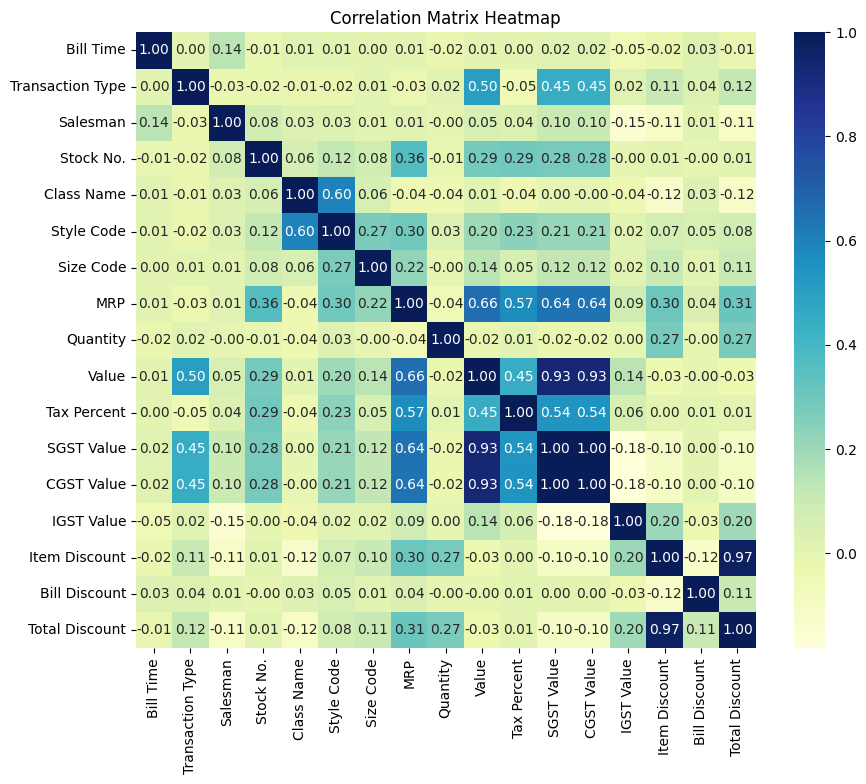

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data loading method)



# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming `df` is your DataFrame

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string to handle mixed types
    label_encoders[column] = le  # Store the encoder for future reference

# Print the DataFrame after encoding
print("\nDataFrame after Label Encoding:")
print(df)



DataFrame after Label Encoding:
       Bill Date  Bill Time  Transaction Type  Bill No.  Salesman  \
0     2022-06-01        438                 1       NaN         6   
1     2022-06-01        438                 1       NaN         6   
2     2022-06-01        438                 1       NaN         6   
3     2022-06-01        438                 1       NaN         6   
4     2022-06-01        438                 1       NaN         6   
...          ...        ...               ...       ...       ...   
37974 2024-06-30      14023                 1       NaN        88   
37975 2024-06-30      14907                 0       NaN        57   
37976 2024-06-30      14907                 1       NaN        88   
37977 2024-06-30       2389                 1       NaN        10   
37978 2024-06-30       4003                 1       NaN        10   

       Sales Promo Code  Sales Promo Description     Stock No.  Class Name  \
0                    66                       10  8.905650e+

In [37]:
print(df)

       Bill Date  Bill Time  Transaction Type  Bill No.  Salesman  \
0     2022-06-01        438                 1       NaN         6   
1     2022-06-01        438                 1       NaN         6   
2     2022-06-01        438                 1       NaN         6   
3     2022-06-01        438                 1       NaN         6   
4     2022-06-01        438                 1       NaN         6   
...          ...        ...               ...       ...       ...   
37974 2024-06-30      14023                 1       NaN        88   
37975 2024-06-30      14907                 0       NaN        57   
37976 2024-06-30      14907                 1       NaN        88   
37977 2024-06-30       2389                 1       NaN        10   
37978 2024-06-30       4003                 1       NaN        10   

       Sales Promo Code  Sales Promo Description     Stock No.  Class Name  \
0                    66                       10  8.905650e+12          34   
1              

In [39]:
print(df)

       Bill Date  Bill Time  Transaction Type  Bill No.  Salesman  \
0     2022-06-01        438                 1       NaN         6   
1     2022-06-01        438                 1       NaN         6   
2     2022-06-01        438                 1       NaN         6   
3     2022-06-01        438                 1       NaN         6   
4     2022-06-01        438                 1       NaN         6   
...          ...        ...               ...       ...       ...   
37974 2024-06-30      14023                 1       NaN        88   
37975 2024-06-30      14907                 0       NaN        57   
37976 2024-06-30      14907                 1       NaN        88   
37977 2024-06-30       2389                 1       NaN        10   
37978 2024-06-30       4003                 1       NaN        10   

       Sales Promo Code  Sales Promo Description     Stock No.  Class Name  \
0                    66                       10  8.905650e+12          34   
1              

In [40]:
df

,Bill Date,Bill Time,Transaction Type,Bill No.,Salesman,Sales Promo Code,Sales Promo Description,Stock No.,Class Name,Style Code,...,Value,Tax Percent,SGST Value,CGST Value,IGST Value,Item Discount,Bill Discount,Total Discount,YearMonth,Year
0,2022-06-01,438,1,NaN,6,66,10,8.905650e+12,34,1370,...,699.0,5.0,16.64,16.64,0.00,0.0,0.0,0.0,2022-06,2022
1,2022-06-01,438,1,NaN,6,66,10,8.905500e+12,34,473,...,1499.0,12.0,80.30,80.30,0.00,0.0,0.0,0.0,2022-06,2022
2,2022-06-01,438,1,NaN,6,66,10,8.905500e+12,34,524,...,999.0,5.0,23.79,23.79,0.00,0.0,0.0,0.0,2022-06,2022
3,2022-06-01,438,1,NaN,6,66,10,8.905500e+12,65,4826,...,3349.0,12.0,179.41,179.41,0.00,0.0,0.0,0.0,2022-06,2022
4,2022-06-01,438,1,NaN,6,66,10,8.905380e+12,65,4184,...,3049.0,12.0,163.34,163.34,0.00,0.0,0.0,0.0,2022-06,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37974,2024-06-30,14023,1,NaN,88,128,123,8.905840e+12,70,2950,...,1799.0,12.0,96.38,96.38,0.00,0.0,0.0,0.0,2024-06,2024
37975,2024-06-30,14907,0,NaN,57,128,123,8.909070e+12,65,3004,...,-2499.0,12.0,-133.88,-133.88,0.00,0.0,0.0,0.0,2024-06,2024
37976,2024-06-30,14907,1,NaN,88,128,123,8.909070e+12,65,3004,...,2499.0,12.0,133.88,133.88,0.00,0.0,0.0,0.0,2024-06,2024
37977,2024-06-30,2389,1,NaN,10,128,123,8.905840e+12,74,5228,...,1749.0,12.0,0.00,0.00,187.39,750.0,0.0,750.0,2024-06,2024


In [42]:
import pandas as pd


# Print all column names to check for any discrepancies
print("Columns in the DataFrame:")
print(df.columns)

# Define the column you want to drop, ensuring no leading/trailing spaces
column_to_remove = 'YearMonth'.strip()

# Drop the specified column
if column_to_remove in df.columns:
    df = df.drop(columns=[column_to_remove])
    print("\nDataFrame after removing the specified column:")
else:
    print(f"Column '{column_to_remove}' not found in the DataFrame.")

# Print the resulting DataFrame
df



Columns in the DataFrame:
Index(['Bill Date', 'Bill Time', 'Transaction Type', 'Bill No.', 'Salesman',
       'Sales Promo Code', 'Sales Promo Description', 'Stock No.',
       'Class Name', 'Style Code', 'Size Code', 'MRP', 'Quantity', 'Value',
       'Tax Percent', 'SGST Value', 'CGST Value', 'IGST Value',
       'Item Discount', 'Bill Discount', 'Total Discount', 'Year'],
      dtype='object')
Column 'YearMonth' not found in the DataFrame.


,Bill Date,Bill Time,Transaction Type,Bill No.,Salesman,Sales Promo Code,Sales Promo Description,Stock No.,Class Name,Style Code,...,Quantity,Value,Tax Percent,SGST Value,CGST Value,IGST Value,Item Discount,Bill Discount,Total Discount,Year
0,2022-06-01,438,1,NaN,6,66,10,8.905650e+12,34,1370,...,1,699.0,5.0,16.64,16.64,0.00,0.0,0.0,0.0,2022
1,2022-06-01,438,1,NaN,6,66,10,8.905500e+12,34,473,...,1,1499.0,12.0,80.30,80.30,0.00,0.0,0.0,0.0,2022
2,2022-06-01,438,1,NaN,6,66,10,8.905500e+12,34,524,...,1,999.0,5.0,23.79,23.79,0.00,0.0,0.0,0.0,2022
3,2022-06-01,438,1,NaN,6,66,10,8.905500e+12,65,4826,...,1,3349.0,12.0,179.41,179.41,0.00,0.0,0.0,0.0,2022
4,2022-06-01,438,1,NaN,6,66,10,8.905380e+12,65,4184,...,1,3049.0,12.0,163.34,163.34,0.00,0.0,0.0,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37974,2024-06-30,14023,1,NaN,88,128,123,8.905840e+12,70,2950,...,1,1799.0,12.0,96.38,96.38,0.00,0.0,0.0,0.0,2024
37975,2024-06-30,14907,0,NaN,57,128,123,8.909070e+12,65,3004,...,-1,-2499.0,12.0,-133.88,-133.88,0.00,0.0,0.0,0.0,2024
37976,2024-06-30,14907,1,NaN,88,128,123,8.909070e+12,65,3004,...,1,2499.0,12.0,133.88,133.88,0.00,0.0,0.0,0.0,2024
37977,2024-06-30,2389,1,NaN,10,128,123,8.905840e+12,74,5228,...,1,1749.0,12.0,0.00,0.00,187.39,750.0,0.0,750.0,2024


In [120]:
import pandas as pd


# Specify the output CSV file path
output_csv_path = 'preprocessed_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)

print(f"Pre-processed data has been saved to {output_csv_path}")

Pre-processed data has been saved to preprocessed_data.csv
